In [2]:
# import the necessary libraries and modules for this activity

import pandas as pd
from wordcloud import WordCloud, STOPWORDS

import matplotlib.pyplot as plt

In [3]:
# take a look at STOPWORDS

STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [4]:
type(STOPWORDS)

set

In [5]:
# load in data from 27th august attendance form responses
aug27 = pd.read_csv("27August2022_Attendance.csv")

In [6]:
# display basic info about aug27 data
aug27.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 4 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Timestamp                              63 non-null     object
 1   Username                               63 non-null     object
 2   Name                                   63 non-null     object
 3   What does "August" make you think of?  63 non-null     object
dtypes: object(4)
memory usage: 2.1+ KB


In [7]:
# load in data from 3rd september attendance form responses
sep3 = pd.read_csv("3September2022_Attendance.csv")

In [8]:
# display basic info about sep3 data
sep3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 4 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Timestamp                                 59 non-null     object
 1   Username                                  59 non-null     object
 2   Name                                      59 non-null     object
 3   What does "September" make you think of?  59 non-null     object
dtypes: object(4)
memory usage: 2.0+ KB


In [9]:
# remove email address and name to protect student privacy

aug27 = aug27.drop(columns = ["Username", "Name"])

sep3 = sep3.drop(columns = ["Username", "Name"])

In [10]:
# display first few rows of aug27 data

aug27.head()

,Timestamp,"What does ""August"" make you think of?"
0,2022/08/27 12:02:59 PM MDT,God’s Blessings
1,2022/08/27 12:03:12 PM MDT,The August Rush movie
2,2022/08/27 12:03:18 PM MDT,My mum. She was born in August.
3,2022/08/27 12:03:35 PM MDT,My mum
4,2022/08/27 12:03:36 PM MDT,Rain


In [11]:
# display first few rows of sep3 data

sep3.head()

,Timestamp,"What does ""September"" make you think of?"
0,2022/09/03 12:04:22 PM MDT,Rain
1,2022/09/03 12:04:30 PM MDT,My daughter’s birth
2,2022/09/03 12:04:51 PM MDT,Birthdays
3,2022/09/03 12:05:14 PM MDT,Makes me think of going on a vacation
4,2022/09/03 12:05:15 PM MDT,End of the year


In [20]:
aug_words = ""
for val in aug27.iloc[:, 1].str.lower():
    words = val.split()
    aug_words += " ".join(words)+" "

In [21]:
print(aug_words)

god’s blessings the august rush movie my mum. she was born in august. my mum rain summer all the things i could have accomplished but haven’t. lol. winter is leaving! holiday & rain my birthday rain end of winter season. how close to the year ending we are. divine surprises end of summer it makes me think of the new beginnings holidays at the beach my birthday new beginnings can't think of anything birthdays ;because i have like 3 important people whose birthday falls in august back to school rain. it’s the period of rain in nigeria a good time in life. fall summer approaching the last quarter of the year august makes me think of holidays past. 1. something inportant and 2. ember months are almost here. in other words, christmas is almost here . 😆 dry season sunny days with wind blowing dried leaves from trees and flowers in full bloom. windy weather the beginning of better weather. virgo season and my birthday!!!! no rain my birthday and leo season and abundance nothing my sister's bi

In [22]:
sep_words = ""
for val in sep3.iloc[:, 1].str.lower():
    words = val.split()
    sep_words += " ".join(words)+" "

In [23]:
print(sep_words)

rain my daughter’s birth birthdays makes me think of going on a vacation end of the year blessings its the ember month, so it means christmas is close. end of summer. lots of rain autumn my best friend's birthday promotion new beginnings almost christmas season. making hard decisions🤗 school endings and new beginnings speed. that i need speed. beginning of summer season the september song by earth wind and fire spring, new beginnings, blossom no idea the days of the last rains year end life🥹 fall/autumn happiness and achieved goals growth warmth its the month i gave birth to my baby so its one of my memorable month the year is almost ending a last amazing quarter of 2022 i've actually been manifesting good deals, opportunities and money this past few months. i feel like something big and great is about to happen. i feel good about september. it's like i'm living in my perfect future. all the gifts i have to buy because i have so many friends with birthdays in september. 😂 my birthday 🎂

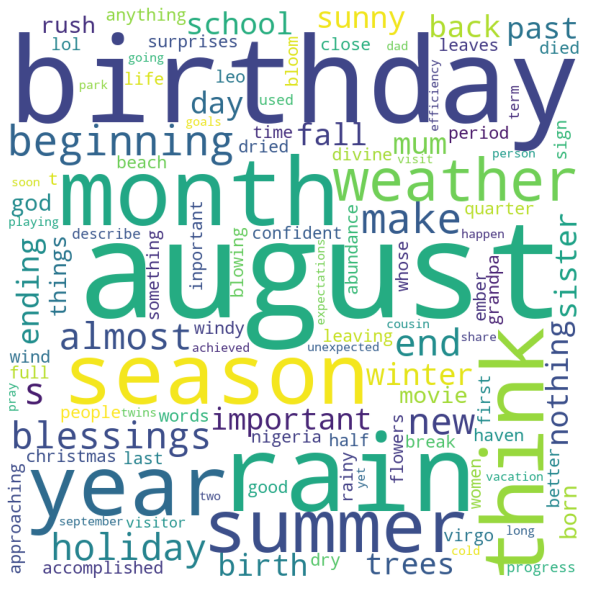

In [25]:
# create wordcloud for august
aug_wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = STOPWORDS,
                min_font_size = 10).generate(aug_words)
 
# plot wordcloud for august                     
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(aug_wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [26]:
# save wordcloud for august as a png file

aug_wordcloud.to_file("aug_wordcloud.png")

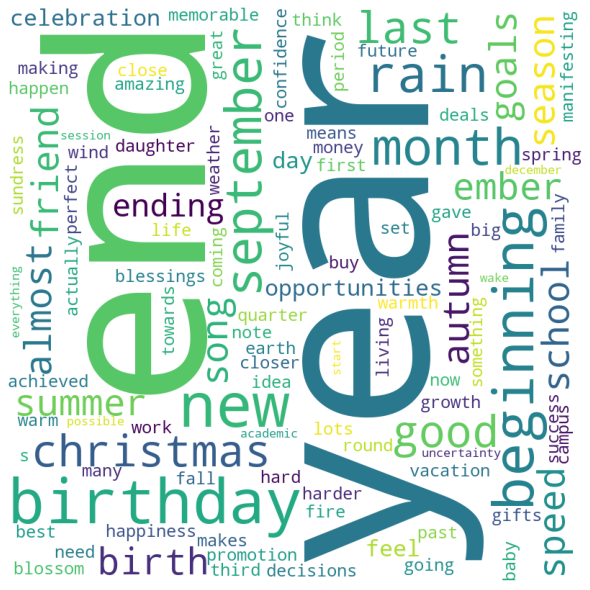

In [27]:
# create wordcloud for september
sep_wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = STOPWORDS,
                min_font_size = 10).generate(sep_words)
 
# plot wordcloud for september                     
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(sep_wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [28]:
# save wordcloud for september as a png file

sep_wordcloud.to_file("sep_wordcloud.png")